In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd

from scipy.stats import multivariate_normal as mvn

%matplotlib inline

In [37]:
data = pd.read_csv("donut.csv", header = None)

In [38]:
data.head()

,0
0,1.823942360433377097e+00 -1.146120866951919892...
1,7.502854598957227061e-01 1.064485258017476843e...
2,1.577960703558637601e+00 1.125407965407776434e...
3,3.932518160242990390e-01 -5.476939453545561776...
4,2.463078900648939751e+00 -8.489925711833897770...


In [39]:
data.shape

(4000, 1)

In [40]:
type(data.iloc[0,0])

str

In [41]:
df = data.iloc[:,0].str.split(expand=True)

In [42]:
df[0] = df[0].astype(float)
df[1] = df[1].astype(float)
df[2] = df[2].astype(float)

In [43]:
X = df.drop([2], axis=1).to_numpy()
y = df[2].to_numpy()

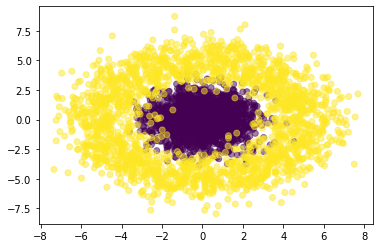

In [44]:
plt.figure()
plt.scatter(X[:,0],X[:,1], c=y, alpha=0.5)
plt.show()

In [45]:
class GaussBayes():
    def fit(self, X, y, epsilon = 1):
        self.likelihoods = dict()
        self.priors = dict()
        
        self.K = set(y.astype(int))
        
        for k in self.K:
            X_k = X[y == k,:]
            N_k, D = X_k.shape
            mu_k = X_k.mean(axis=0)
            self.likelihoods[k] = {"mean": mu_k, "cov":(1/(N_k - 1))*np.matmul((X_k).T,X_k-mu_k)+epsilon*np.identity(D)}
            self.priors[k] = len(X_k)/len(X)
            
    def predict(self, X):
        N, D = X.shape
        
        P_hat = np.zeros((N,len(self.K)))
        
        for k, l in self.likelihoods.items():
            P_hat[:,k] = mvn.logpdf(X, l["mean"], l["cov"]) + np.log(self.priors[k])
            
        return P_hat.argmax(axis = 1)

In [46]:
gbayes = GaussBayes()
gbayes.fit(X,y)
y_hat_gb = gbayes.predict(X)

In [47]:
def accuracy(y, y_hat_gb):
    return np.mean(y == y_hat_gb)

In [48]:
print(f"Accuracy: {accuracy(y, y_hat_gb):0.3f}")

Accuracy: 0.968


In [51]:
missed = df[y != y_hat_gb]

In [52]:
missed.head()

,0,1,2
43,4.532156,-1.849862,0.0
71,3.621414,1.612645,0.0
171,3.186041,2.068507,0.0
190,2.558566,2.288376,0.0
211,-0.265109,3.364002,0.0


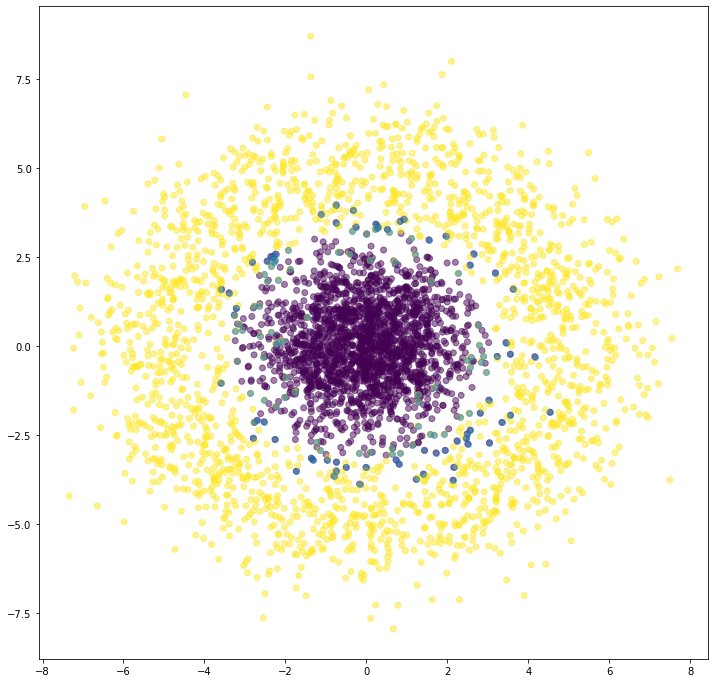

In [57]:
plt.figure(figsize=(12,12))
plt.scatter(X[:,0],X[:,1], c=y, alpha=0.5)
plt.scatter(missed[0], missed[1], alpha=0.5)
plt.show()

The Donut problem cannot be solved by the Bayes Classifier.  Bayes uses probablity to determine the class for the data point. This data set is complex and isn't linearly seperable, we cannot draw a straight line to capable of separating the classes. This is evident in the plot, where the data points that lie between the classes were mostly misclassified. The accuracy achieved by the model was 95.8% and was not changed when the epsilon value was modified. 